Importing required libraries

In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from dmba import regressionSummary, classificationSummary

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import BayesianRidge
import matplotlib.pylab as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="Set2", rc=custom_params)

Reading the .csv file

In [ ]:
area_df=pd.read_csv("fulfilment_center_info.csv")
#displays the first five rows of the dataframe
area_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


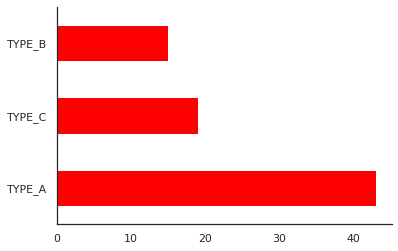

In [ ]:
#plotting center type in bar chart
area_df['center_type'].value_counts().plot(kind='barh',color="red")

In [ ]:
print("Number of different centers from where the order dispatched")
len(area_df['center_id'].unique())

Number of different centers from where the order dispatched


77

Reading .csv file

In [ ]:
meal_df=pd.read_csv("meal_info.csv")
meal_df.head(7)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian


In [ ]:
#getting the dataset information
meal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


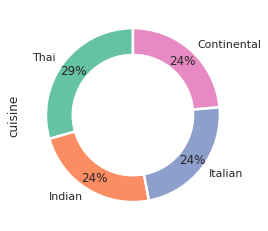

In [ ]:
#plotting cuisine in donut chart
meal_df['cuisine'].value_counts().plot(kind='pie',autopct='%0.0f%%',startangle=90, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : 'white' }, pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.70, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

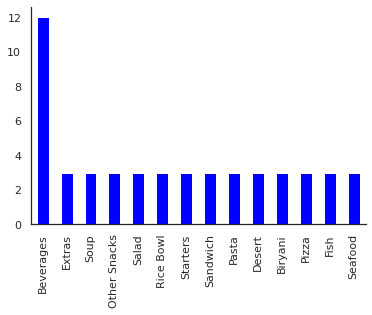

In [ ]:
#plotting the meal category in bar graph
meal_df['category'].value_counts().plot(kind='bar',color="blue")

Reading .csv file

In [ ]:
df=pd.read_csv("Food demand.csv")
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1000000,3,157,2760,233.83,231.83,0,0,149
1,1000001,100,104,2956,486.03,583.03,0,0,161
2,1000002,143,75,1971,328.86,327.86,0,0,149
3,1000003,41,24,2539,145.53,145.53,0,0,540
4,1000004,45,83,2539,95.06,120.34,0,0,271
...,...,...,...,...,...,...,...,...,...
1994,1002177,89,72,1311,130.04,177.51,0,0,68
1995,1002178,24,50,2444,604.31,606.31,0,0,109
1996,1002179,43,88,1971,291.06,291.06,0,0,366
1997,1002180,107,58,1543,473.39,473.39,0,1,42


In [ ]:
#getting the count, mean, std, min, 3 quartiles, and max vales
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.001093e+06,75.393197,81.649825,2010.123562,327.302596,347.972866,0.076538,0.105053,258.340170
std,6.323493e+02,41.743802,46.139173,554.686525,150.906902,158.625091,0.265924,0.306698,413.743045
min,1.000000e+06,1.000000,10.000000,1062.000000,65.020000,93.120000,0.000000,0.000000,13.000000
25%,1.000546e+06,40.000000,43.000000,1543.000000,222.645000,242.530000,0.000000,0.000000,55.000000
50%,1.001094e+06,78.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,148.000000
75%,1.001638e+06,111.500000,110.000000,2539.000000,435.530000,447.230000,0.000000,0.000000,324.000000
max,1.002181e+06,145.000000,186.000000,2956.000000,767.330000,767.330000,1.000000,1.000000,12137.000000


In [ ]:
#getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1999 non-null   int64  
 1   week                   1999 non-null   int64  
 2   center_id              1999 non-null   int64  
 3   meal_id                1999 non-null   int64  
 4   checkout_price         1999 non-null   float64
 5   base_price             1999 non-null   float64
 6   emailer_for_promotion  1999 non-null   int64  
 7   homepage_featured      1999 non-null   int64  
 8   num_orders             1999 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [ ]:
#finding null values
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [ ]:
#droping unnecessary columns
df=df.drop(columns=['emailer_for_promotion','homepage_featured'])

In [ ]:
#displays the first five rows of the dataframe
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders
0,1000000,3,157,2760,233.83,231.83,149
1,1000001,100,104,2956,486.03,583.03,161
2,1000002,143,75,1971,328.86,327.86,149
3,1000003,41,24,2539,145.53,145.53,540
4,1000004,45,83,2539,95.06,120.34,271


In [ ]:
#merging the datasets on center_id
df=pd.merge(df,area_df,on='center_id')

In [ ]:
#displays the first five rows of the dataframe
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area
0,1000000,3,157,2760,233.83,231.83,149,609,93,TYPE_A,4.1
1,1000251,126,157,2306,338.53,340.53,15,609,93,TYPE_A,4.1
2,1000336,16,157,2492,445.23,447.23,55,609,93,TYPE_A,4.1
3,1000406,103,157,1109,192.09,339.50,68,609,93,TYPE_A,4.1
4,1000520,128,157,1230,363.78,363.78,190,609,93,TYPE_A,4.1


In [ ]:
#merging the datasets on meal_id
df=pd.merge(df,meal_df,on='meal_id')

In [ ]:
#displays the first five rows of the dataframe
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1000000,3,157,2760,233.83,231.83,149,609,93,TYPE_A,4.1,Other Snacks,Thai
1,1001086,144,157,2760,184.36,261.93,96,609,93,TYPE_A,4.1,Other Snacks,Thai
2,1001863,120,157,2760,219.28,241.53,27,609,93,TYPE_A,4.1,Other Snacks,Thai
3,1000867,38,24,2760,242.53,242.53,204,614,85,TYPE_B,3.6,Other Snacks,Thai
4,1001080,131,83,2760,260.93,260.93,107,659,77,TYPE_A,5.3,Other Snacks,Thai


In [ ]:
#getting the columns names
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'num_orders', 'city_code', 'region_code', 'center_type', 'op_area',
       'category', 'cuisine'],
      dtype='object')

In [ ]:
#Finding the unique values in category variable
df['category'].unique()

array(['Other Snacks', 'Pasta', 'Desert', 'Rice Bowl', 'Beverages',
       'Sandwich', 'Pizza', 'Salad', 'Fish', 'Seafood', 'Biryani',
       'Extras', 'Starters', 'Soup'], dtype=object)

In [ ]:
#Finding the unique values in center_type variable
df["center_type"].unique()

array(['TYPE_A', 'TYPE_B', 'TYPE_C'], dtype=object)

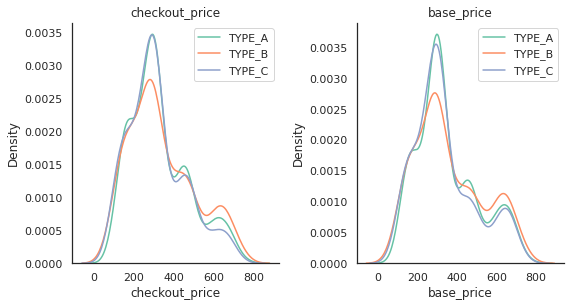

In [ ]:
#Ploting center_type for checkout_price and base_price
TYPE_A = df[df["center_type"] == "TYPE_A"]
TYPE_B = df[df["center_type"] == "TYPE_B"]
TYPE_C = df[df["center_type"] == "TYPE_C"]

plt.figure(figsize = (16,16))
for ax, col in enumerate(df.columns[4:6]):
    plt.subplot(4,4, ax + 1)# here 4,4 will result 4 graphs
    plt.title(col)
    sns.kdeplot(x = TYPE_A[col], label = "TYPE_A")
    sns.kdeplot(x = TYPE_B[col], label = "TYPE_B")
    sns.kdeplot(x = TYPE_C[col], label = "TYPE_C")

    plt.legend()
plt.tight_layout()

The above plot is based on the prices according to different center types. The above plot has both base price and the checkout price of the products on an average in different centers. By analyzing the plot, we can understand the total profit and loss in different centers. By analyzing the profits and losses we can understand the flow in certain centers and can predict the margin of each center.

In [ ]:
#Finding the unique values in cuisine variable
df["cuisine"].unique()

array(['Thai', 'Italian', 'Indian', 'Continental'], dtype=object)

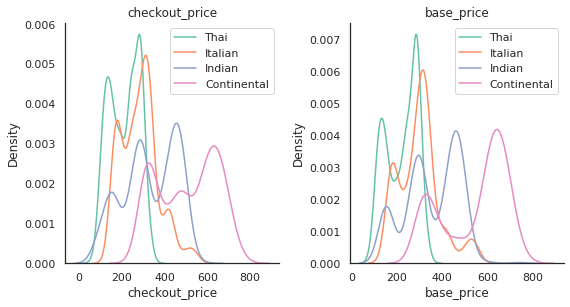

In [ ]:
#Ploting cuisine for checkout_price and base_price
A = df[df["cuisine"] == "Thai"]
B = df[df["cuisine"] == "Italian"]
C = df[df["cuisine"] == "Indian"]
D = df[df["cuisine"] == "Continental"]

plt.figure(figsize = (16,16))
for ax, col in enumerate(df.columns[4:6]):
    plt.subplot(4,4, ax + 1)# here 4,4 will result 4 graphs
    plt.title(col)
    sns.kdeplot(x = A[col], label = "Thai")
    sns.kdeplot(x = B[col], label = "Italian")
    sns.kdeplot(x = C[col], label = "Indian")
    sns.kdeplot(x = D[col], label = "Continental")


    plt.legend()
plt.tight_layout()

The above plot is based on the prices according to various cuisines. The above plot has both base price and the checkout price of the products on an average in different cuisines. By analyzing the plot, we can understand the total profit and loss on cuisines. By analyzing the profits and losses we can understand the flow in certain centers and can predict the margin of each cuisine which can help us in collecting the stock on different cuisines.


Finding Pairplots


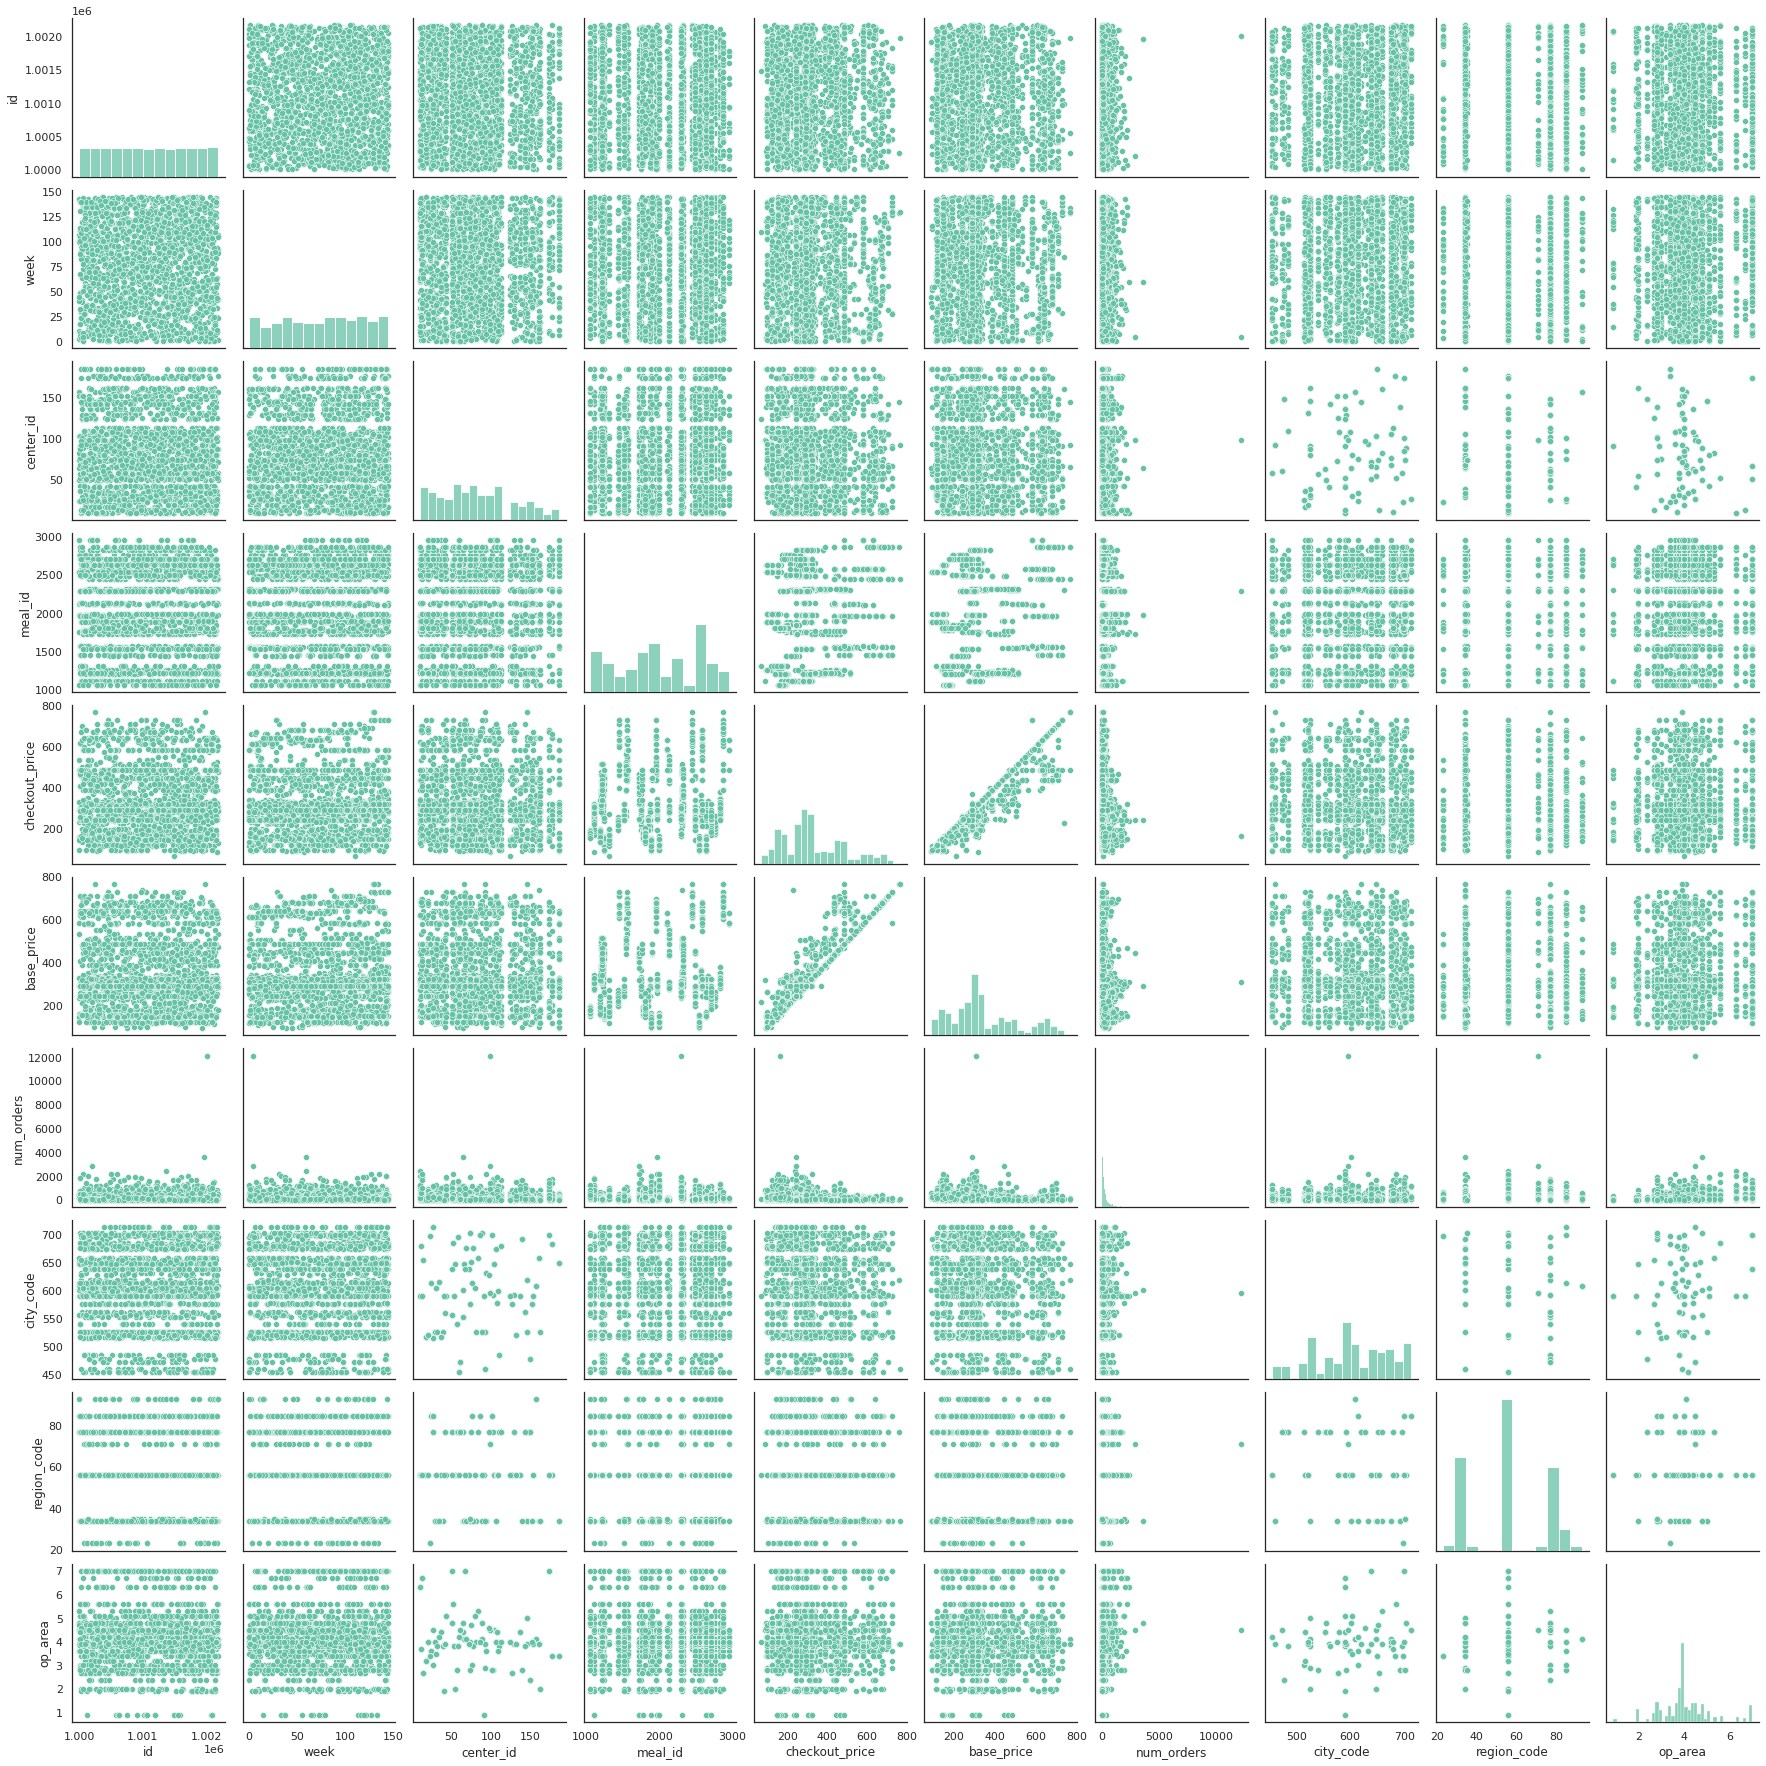

In [ ]:
sns.pairplot(df)

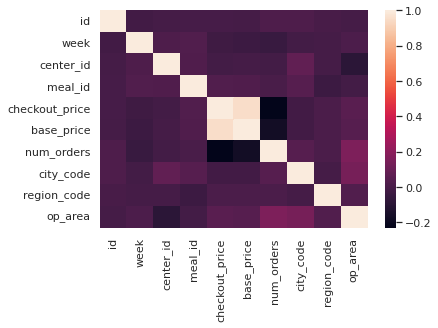

In [ ]:
#calculating the correaltion and ploting it on heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cuisine']=le.fit_transform(df['cuisine'])
df['center_type']=le.fit_transform(df['center_type'])
df['category']=le.fit_transform(df['category'])


In [ ]:
df

,id,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1000000,3,157,2760,233.83,231.83,149,609,93,0,4.1,5,3
1,1001086,144,157,2760,184.36,261.93,96,609,93,0,4.1,5,3
2,1001863,120,157,2760,219.28,241.53,27,609,93,0,4.1,5,3
3,1000867,38,24,2760,242.53,242.53,204,614,85,1,3.6,5,3
4,1001080,131,83,2760,260.93,260.93,107,659,77,0,5.3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1001791,145,143,2104,582.03,581.03,69,562,77,1,3.8,4,0
1995,1001295,141,74,2104,582.03,581.03,14,702,35,0,2.8,4,0
1996,1000382,64,61,2104,629.53,631.53,41,473,77,0,4.5,4,0
1997,1001089,114,61,2104,588.79,590.79,82,473,77,0,4.5,4,0


In [ ]:
#droping id column
df=df.drop(columns='id')

In [ ]:
df

,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,3,157,2760,233.83,231.83,149,609,93,0,4.1,5,3
1,144,157,2760,184.36,261.93,96,609,93,0,4.1,5,3
2,120,157,2760,219.28,241.53,27,609,93,0,4.1,5,3
3,38,24,2760,242.53,242.53,204,614,85,1,3.6,5,3
4,131,83,2760,260.93,260.93,107,659,77,0,5.3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,145,143,2104,582.03,581.03,69,562,77,1,3.8,4,0
1995,141,74,2104,582.03,581.03,14,702,35,0,2.8,4,0
1996,64,61,2104,629.53,631.53,41,473,77,0,4.5,4,0
1997,114,61,2104,588.79,590.79,82,473,77,0,4.5,4,0


Training the models

In [ ]:
predictors =[ 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine']
outcome = 'num_orders'

X = df[predictors]
y = df[outcome]

# partition data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#printing the dimensions
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1599, 11)
(400, 11)
(1599,)
(400,)


Models

Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)

RandomForestRegressor()

Regression summary

In [ ]:
# training
regressionSummary(train_y, rf.predict(train_X))
# validation
regressionSummary(test_y, rf.predict(test_X))


Regression statistics

                      Mean Error (ME) : -5.1697
       Root Mean Squared Error (RMSE) : 134.1468
            Mean Absolute Error (MAE) : 50.7342
          Mean Percentage Error (MPE) : -28.9770
Mean Absolute Percentage Error (MAPE) : 37.4219

Regression statistics

                      Mean Error (ME) : -31.5527
       Root Mean Squared Error (RMSE) : 221.3826
            Mean Absolute Error (MAE) : 132.3355
          Mean Percentage Error (MPE) : -92.4309
Mean Absolute Percentage Error (MAPE) : 112.4979


In [ ]:
#calcluating Mean squared error
MSE=mean_squared_error(train_y,rf.predict(train_X))
MSE

17995.368997310823

In [ ]:
#calculating R squared
r2=r2_score(train_y,rf.predict(train_X))
r2

0.9049112915165172

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

Regression summary

In [ ]:
# training
regressionSummary(train_y, lr.predict(train_X))
# validation
regressionSummary(test_y, lr.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 404.2196
            Mean Absolute Error (MAE) : 195.1953
          Mean Percentage Error (MPE) : -160.8192
Mean Absolute Percentage Error (MAPE) : 219.4809

Regression statistics

                      Mean Error (ME) : 3.1304
       Root Mean Squared Error (RMSE) : 280.7624
            Mean Absolute Error (MAE) : 185.3807
          Mean Percentage Error (MPE) : -142.7065
Mean Absolute Percentage Error (MAPE) : 214.3767


In [ ]:
#calcluating Mean squared error
MSE=mean_squared_error(train_y,lr.predict(train_X))
MSE

163393.50022405767

In [ ]:
#calculating R squared
r2=r2_score(train_y,lr.predict(train_X))
r2

0.13661804249620557

Xgboost Regressor

In [ ]:
import xgboost as xgb
xgb=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(train_X,train_y)

[22:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

Regression summary

In [ ]:
# training
regressionSummary(train_y, xgb.predict(train_X))
# validation
regressionSummary(test_y, xgb.predict(test_X))


Regression statistics

                      Mean Error (ME) : 93.3079
       Root Mean Squared Error (RMSE) : 359.5107
            Mean Absolute Error (MAE) : 156.0619
          Mean Percentage Error (MPE) : -74.4509
Mean Absolute Percentage Error (MAPE) : 117.1119

Regression statistics

                      Mean Error (ME) : 90.4496
       Root Mean Squared Error (RMSE) : 291.5579
            Mean Absolute Error (MAE) : 160.9225
          Mean Percentage Error (MPE) : -80.4611
Mean Absolute Percentage Error (MAPE) : 124.5857


In [ ]:
#calcluating Mean squared error
MSE=mean_squared_error(train_y,xgb.predict(train_X))
MSE

129247.90955415349

In [ ]:
#calculating R squared
r2=r2_score(train_y,xgb.predict(train_X))
r2

0.31704558014169937

Support vector machine Regressor

In [ ]:
svm = SVR()
svm.fit(train_X,train_y)

SVR()

Regression summary

In [ ]:
# training
regressionSummary(train_y, svm.predict(train_X))
# validation
regressionSummary(test_y, svm.predict(test_X))


Regression statistics

                      Mean Error (ME) : 115.6317
       Root Mean Squared Error (RMSE) : 448.8388
            Mean Absolute Error (MAE) : 193.9638
          Mean Percentage Error (MPE) : -106.4076
Mean Absolute Percentage Error (MAPE) : 158.1633

Regression statistics

                      Mean Error (ME) : 113.3291
       Root Mean Squared Error (RMSE) : 331.4003
            Mean Absolute Error (MAE) : 189.7209
          Mean Percentage Error (MPE) : -106.0646
Mean Absolute Percentage Error (MAPE) : 158.5903


In [ ]:
#calcluating Mean squared error
MSE=mean_squared_error(train_y,svm.predict(train_X))
MSE

201456.23876258524

In [ ]:
#calculating R squared
r2=r2_score(train_y,svm.predict(train_X))
r2

-0.06450796106137302

Hyperparameter tuning

In [ ]:
#getting the parameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rscv= RandomizedSearchCV(rf, random_grid, refit = True,random_state=42)

# fitting the model for grid search
rscv.fit(train_X, train_y)

In [ ]:
# printing best parameter after tuning
print(rscv.best_params_)

# printing how our model looks after hyper-parameter tuning
print(rscv.best_estimator_)

{'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=311)


In [ ]:
#calcluating Mean squared error
MSE=mean_squared_error(train_y,rscv.predict(train_X))
MSE

33128.369707871556

Regression summary

In [ ]:
# training
regressionSummary(train_y, rscv.predict(train_X))
# validation
regressionSummary(test_y, rscv.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 182.0120
            Mean Absolute Error (MAE) : 46.0708
          Mean Percentage Error (MPE) : -23.6099
Mean Absolute Percentage Error (MAPE) : 30.9530

Regression statistics

                      Mean Error (ME) : -19.0941
       Root Mean Squared Error (RMSE) : 199.3860
            Mean Absolute Error (MAE) : 122.1455
          Mean Percentage Error (MPE) : -87.0889
Mean Absolute Percentage Error (MAPE) : 105.9832


In [ ]:
#calculating R squared
r2=r2_score(train_y,rscv.predict(train_X))
r2

0.8249475245461435